# Grid Search for Parameter Tuning

In the first three modules, we learned several models and fitted them using some parameters that are user-defined (aka Hyperparameters). Hyperparameters are parameters of the model that are not learned. 
The default values or manual setting of values for hyperparameter are often a good start, but they may not produce the optimal model. Instead of hand picking values, it is possible to automate this process using grid search and random search. In this lab we breifly intrduce grid search and we will continue our discussion on grid search and random search in Module 5.  


Grid search is a common method to select the hyperparameter values that produce the best model. Grid search takes a set of possible values for each hyperparameter that should be tuned, and evaluates a model trained on each  possible combination of the hyperparameter values. It is an exhaustive search that trains and evaluates a model for each possible combination. A disadvantage of grid search is that it is computationally costly for even small sets of hyperparameter values. Fortunately, it is an embarrassingly parallel problem; many models can easily be trained and evaluated concurrently since no synchronization is required between the processes.

In this lab we look at grid search with a simple example: we vary some parameters of the DecisionTree method, and learn the best model. 

## Loading Modules

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot
%matplotlib inline

### Load irish dataset

In [2]:
from sklearn.datasets import load_iris

irish = load_iris()

In [3]:
# veiw data
print(irish.feature_names)
print(irish.data[:5,])
print(irish.target_names)
print(irish.target[:5])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0]


### Configure hyperparameter space

To tune the model, we need to provide a set of hyperparameters and a range of values for each of them.  
Here is the parameter list we try out with `DecisionTreeClassifier`. To learn more about this hyperparameters, check here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [4]:
params_list = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [2, 3]
}

Given the above configuration, grid search learns (2 * 3 * 2 = 12) candidate models. 

In [5]:
X = irish.data
y = irish.target

### Split the dataset into training and test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 111)

### Execute grid search

For performing grid search, we use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) with a model and a configuration of the hyperparameters. This method seraches all the possible combinations and choose the best one.

In [7]:
grid_analyzer = GridSearchCV(DecisionTreeClassifier(), 
                             params_list, refit = True, verbose = 3, n_jobs=-1)

grid_analyzer.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [2, 3],
                         'min_samples_split': [2, 3, 4]},
             verbose=3)

### Best hyperparams identified by grid search

In [8]:
grid_analyzer.best_params_

{'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2}

### Predicting with the best model

We don't need to retrain the model with the best combination of hyperparameters as grid search object can do this job for us. 

In [9]:
predict = grid_analyzer.predict(X_test)

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      0.71      0.77         7
           2       0.86      0.92      0.89        13

    accuracy                           0.90        30
   macro avg       0.90      0.88      0.89        30
weighted avg       0.90      0.90      0.90        30



### Visualize the tree of the best model

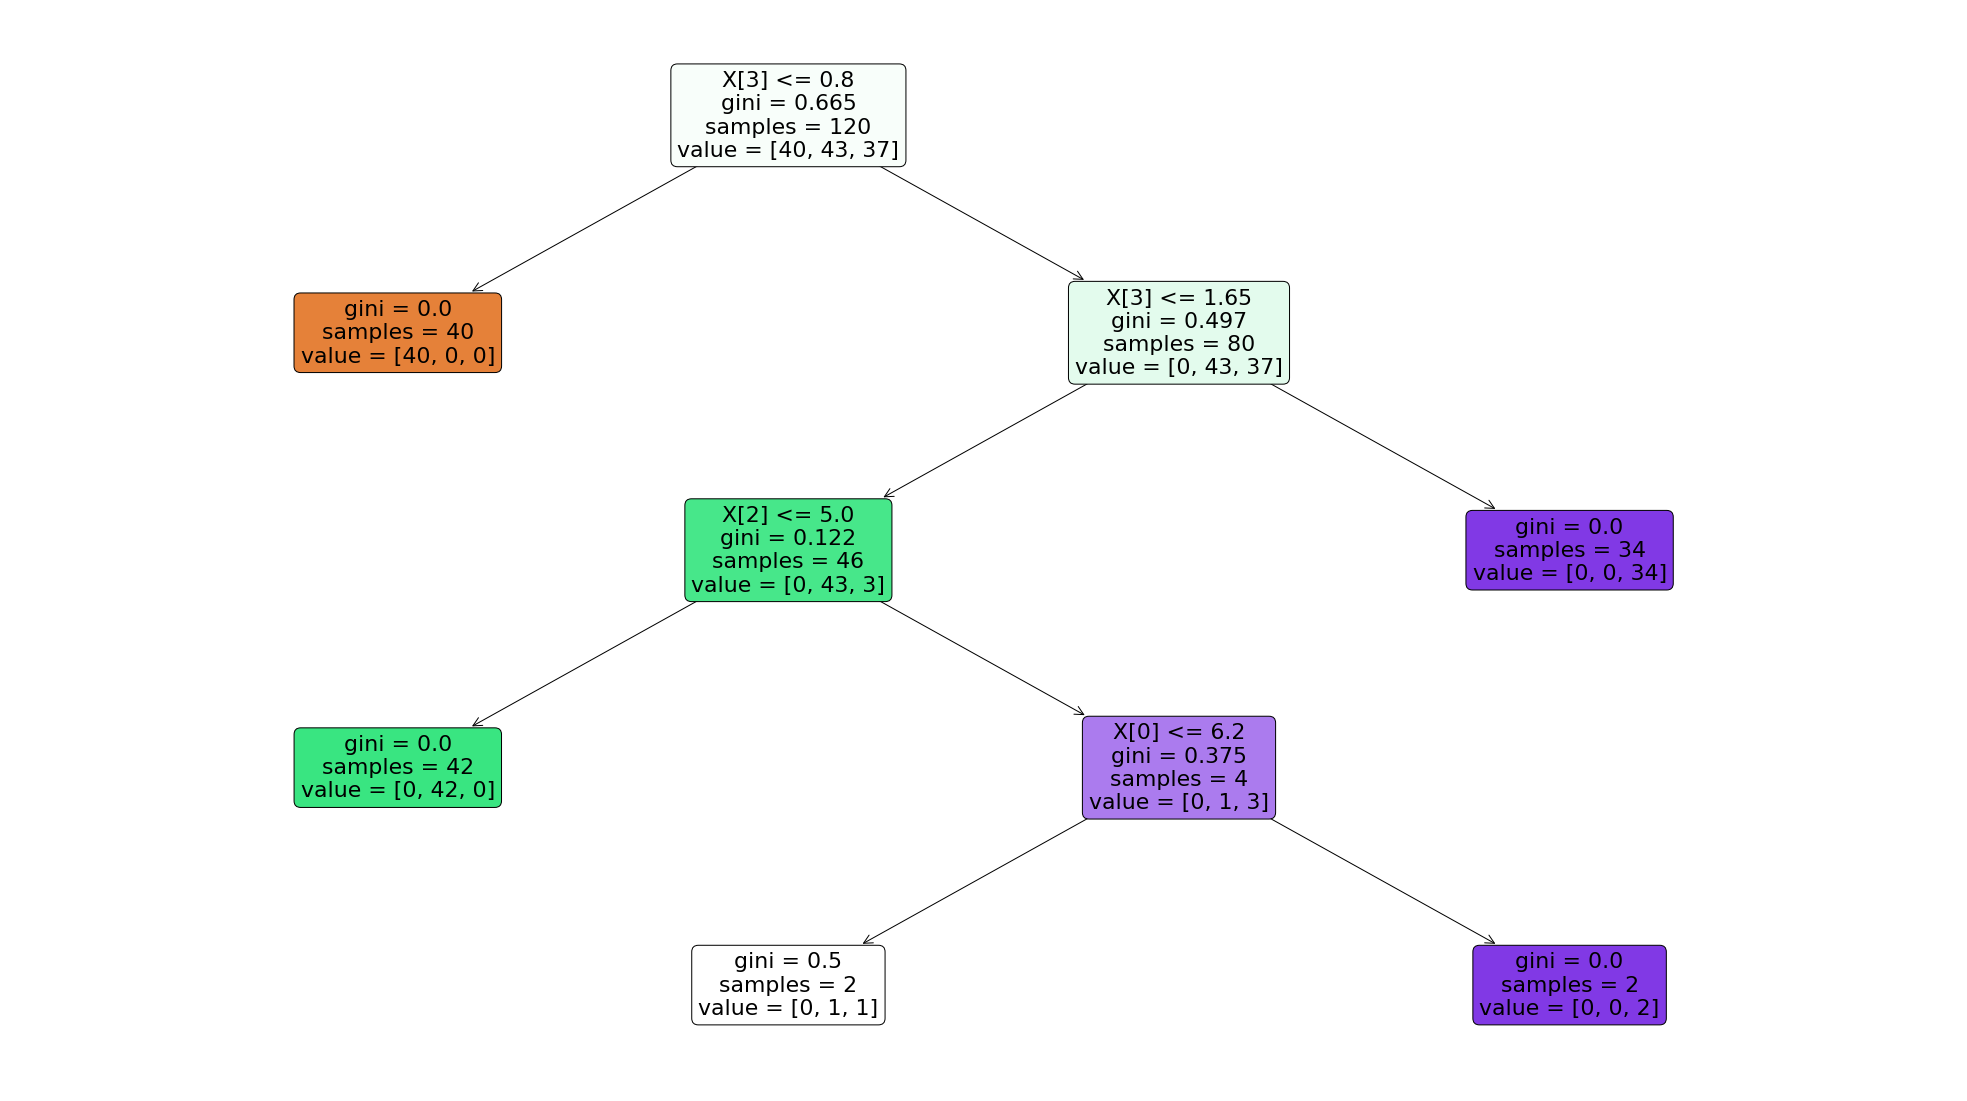

In [10]:
pyplot.figure(figsize=(35,20))
tree = DecisionTreeClassifier(criterion=grid_analyzer.best_params_['criterion'],
                             min_samples_split=grid_analyzer.best_params_['min_samples_split'],
                             min_samples_leaf=grid_analyzer.best_params_['min_samples_leaf'])
tree.fit(X_train, y_train)
a = plot_tree(tree, 
              filled=True, 
              rounded=True, 
              fontsize=22)